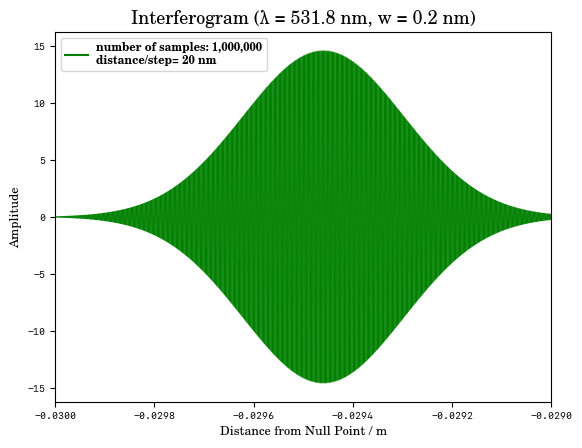

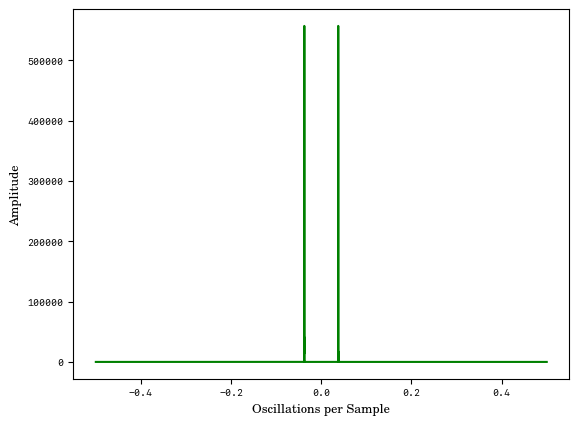

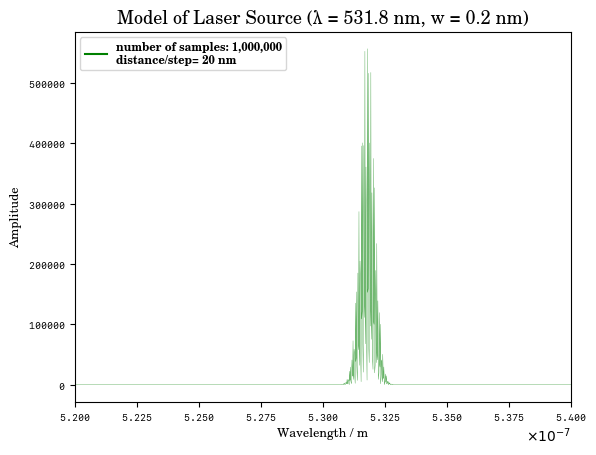

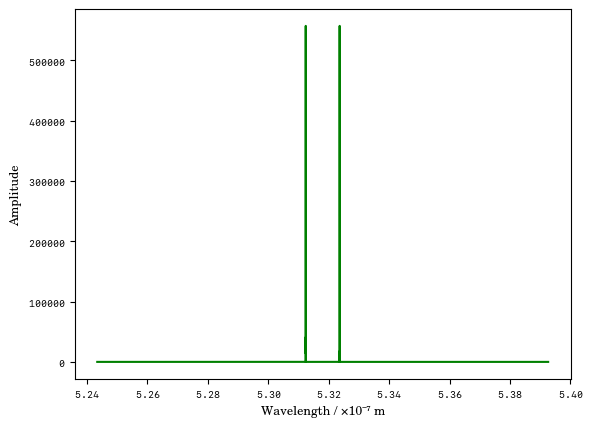

In [37]:
#!/usr/bin/python3

import numpy as np
import numpy.random as npr
import scipy as sp
import pylab as pl
import scipy.fftpack as spf
import matplotlib.font_manager as fnt

titleFont =     {'fontname': 'C059', 'size': 13}
axesFont =      {'fontname': 'C059', 'size': 9}
ticksFont =     {'fontname': 'SF Mono', 'size': 7}
errorStyle =    {'mew': 1, 'ms': 3, 'capsize': 3, 'color': 'blue', 'ls': ''}
pointStyle =    {'mew': 1, 'ms': 3, 'color': 'blue'}
lineStyle =     {'linewidth': 0.5}
lineStyleBold = {'linewidth': 1}
histStyle =     {'facecolor': 'green', 'alpha': 0.5, 'edgecolor': 'black'}
font = fnt.FontProperties(family='C059', weight='bold', style='normal', size=8)

def add_line(x,y,wl,amp,width,nstep):
    """
    This little function adds the effect
    of a a new line on to the interferogram.
    It does this by assuming that each line is made up of lots of descrete delta functions. Also assumes a gausian line shape
    and calculates to +/- 3 sigma
    x is the separation between the mirrors
    y is the amplitude of the light
    wl is the wavelength
    amp is the amplitude (arbitrary scale)
    width is the line width (actually 1 sigma as we assume gaussian)
    nsteps is the 
    """
    #nwidth=30.
    nsigma=6
    amplitude=amp*calc_amp(nsigma,nstep)
    wl_step=nsigma*2.0*width/nstep
    for i in range(len(amplitude)):
        wavelength=wl-nsigma*width+i*wl_step
        y=y+amplitude[i]*np.sin(np.pi*2.*x/wavelength)        
    return y

def calc_amp(nsigma,nsamp):
    """
    Just calculates the amplitude at the various steps
    """
    yy=np.empty(shape=[nsamp])
    step=nsigma*2.0/nsamp
    for i in range(nsamp):
        x=-nsigma+i*step
        size=np.exp(-x*x/4)
        yy[i]=size
    return yy
  

# Now set up the experiment that you want to do

# Na lines
l3=590.8e-9 # not sure about this one
l1=585e-9 # wavelength of spectral line in m
l2=580.0e-9 # wavelength of a second spectral line in m
w3=w1=w2=0.276e-9 # setting the lines to have the same width in m
#l1=800.e-9
#w1=200.e-9

'''
# When you perform the actual experiment you will move
# one mirror to change the path difference. This move will be 
# by a small, finite, amount. You will then take a reading with your detector. 
# Then you will move the mirror again and take another 
# reading and so on. Here you should set up the what these different 
# separations should be
'''

#changed to make it more like the actual experiment -DJC 09062018
nsamp=1000000#number of readings that you will take (set in the software)
dist_per_step=20.e-9 #distance moved (new apparatus prob. 1nm step*2 for path length)
steps_per_sample=1
dsamp=dist_per_step*steps_per_sample

# set the starting point from null point
dstart= -30e-3 # start -3mm from null point

epoint=dstart+dsamp*nsamp



x= np.linspace(dstart,epoint,nsamp) #setting the x locations of the samples
# introduce a little jitter
# make it random for now
#sig_x=10e-9 # 10nm jitter
#for i in x:
#    i=npr.normal(scale=sig_x)+i


y=np.zeros(shape=[len(x)]) #setting the array that will contain your results



# Na spectrum (roughly)

#y=add_line(x,y,l2,1.0,w1,50)
#y=add_line(x,y,l1,0.5,w2,50)
#y=add_line(x,y,l3,0.05,w3,50)
#y=add_line(x,y,l1+0.1e-9,.25,w2,50)
#y=add_line(x,y,l1+0.2e-9,.25,w2,50)
#y=add_line(x,y,535*10**-9,1.0,w1,4000)


#white light 
y=add_line(x,y,531.8e-9,1,0.2e-9,50)

#print(2.*np.pi/l2) 

# plot the output

pl.figure(1)
pl.plot(x,y ,linewidth=0.09,color="green")
pl.plot([],[],color="green", label="number of samples: 1,000,000\ndistance/step= 20 nm")
pl.legend(prop=font, fontsize=8)
pl.xlim(-0.03,-0.029)
#pl.ylim(-22,22)
pl.title("Interferogram (λ = 531.8 nm, w = 0.2 nm)", **titleFont)
pl.xlabel("Distance from Null Point / m", **axesFont)
pl.ylabel("Amplitude", **axesFont)
pl.xticks(**ticksFont)
pl.yticks(**ticksFont)

# take a fourier transform
yf=spf.fft(y)
xf=spf.fftfreq(nsamp) # setting the correct x-axis for the fourier transform. Osciallations/step

#now some shifts to make plotting easier (google if ineterested)
xf=spf.fftshift(xf)
yf=spf.fftshift(yf)


pl.figure(2)
pl.plot(xf,np.abs(yf), color="green")
pl.xlabel("Oscillations per Sample", **axesFont)
pl.ylabel("Amplitude", **axesFont)
pl.xticks(**ticksFont)
pl.yticks(**ticksFont)

# Now try to reconstruct the original wavelength spectrum
# only take the positive part of the FT
# need to go from oscillations per step to steps per oscillation
# time the step size


xx=xf[int(len(xf)/2+1):len(xf)]
repx=dsamp/xx

pl.figure(3)
pl.plot(repx,abs(yf[int(len(xf)/2+1):len(xf)]),color="green", linewidth=0.2)
pl.title("Model of Laser Source (λ = 531.8 nm, w = 0.2 nm)", **titleFont)
pl.xlabel("Wavelength / m", **axesFont)
pl.ylabel("Amplitude", **axesFont)
pl.ticklabel_format(useMathText=True)
# pl.ticklabel_format(style='plain')

pl.plot([],[],color="green", label="number of samples: 1,000,000\ndistance/step= 20 nm")
pl.legend(prop=font, fontsize=8)
pl.xlim(520*10**-9,540*10**-9)
pl.xticks(**ticksFont)
pl.yticks(**ticksFont)

pl.figure(4)
pl.plot(xf/6.7 + 5.318, np.abs(yf), color="green")
pl.xlabel("Wavelength / ×10¯⁷ m", **axesFont)
pl.ylabel("Amplitude", **axesFont)
pl.xticks(**ticksFont)
pl.yticks(**ticksFont)
pl.ticklabel_format(useMathText=True)

pl.show()


/tmp/ipykernel_9515/3528265691.py:117: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  pl.plot(x,y,'bo-',linewidth=0.001,color="yellow")


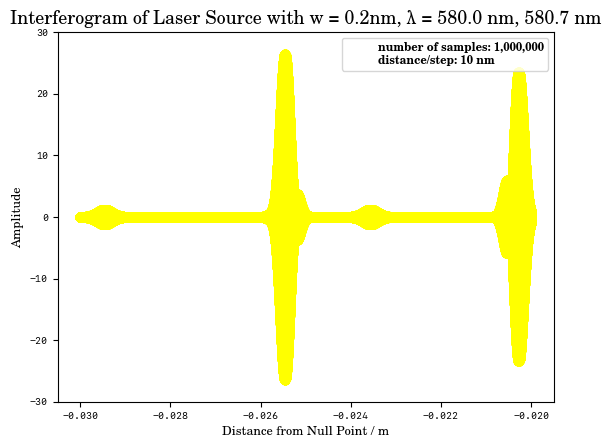

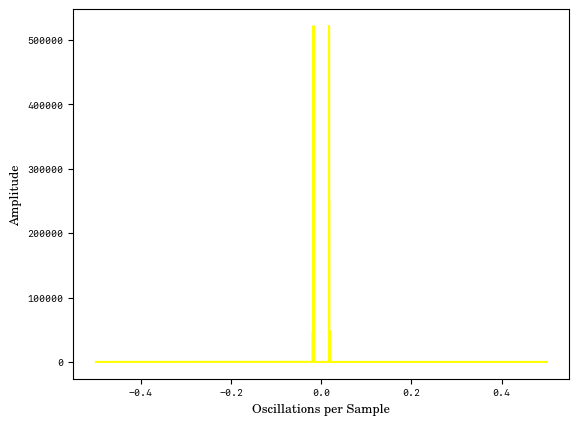

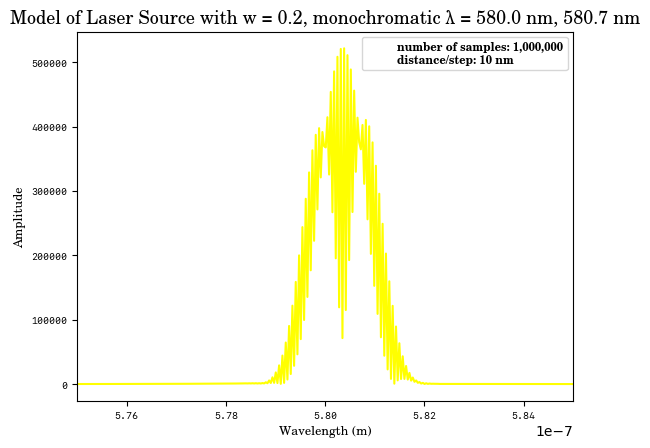

In [46]:

#!/usr/bin/python3

import numpy as np
import numpy.random as npr
import scipy as sp
import pylab as pl
import scipy.fftpack as spf
import matplotlib.font_manager as fnt

titleFont =     {'fontname': 'C059', 'size': 13}
axesFont =      {'fontname': 'C059', 'size': 9}
ticksFont =     {'fontname': 'SF Mono', 'size': 7}
errorStyle =    {'mew': 1, 'ms': 3, 'capsize': 3, 'color': 'blue', 'ls': ''}
pointStyle =    {'mew': 1, 'ms': 3, 'color': 'blue'}
lineStyle =     {'linewidth': 0.5}
lineStyleBold = {'linewidth': 1}
histStyle =     {'facecolor': 'green', 'alpha': 0.5, 'edgecolor': 'black'}
font = fnt.FontProperties(family='C059', weight='bold', style='normal', size=8)

def add_line(x,y,wl,amp,width,nstep):
    """
    This little function adds the effect
    of a a new line on to the interferogram.
    It does this by assuming that each line is made up of lots of descrete delta functions. Also assumes a gausian line shape
    and calculates to +/- 3 sigma
    x is the separation between the mirrors
    y is the amplitude of the light
    wl is the wavelength
    amp is the amplitude (arbitrary scale)
    width is the line width (actually 1 sigma as we assume gaussian)
    nsteps is the 
    """
    #nwidth=30.
    nsigma=6
    amplitude=amp*calc_amp(nsigma,nstep)
    wl_step=nsigma*2.0*width/nstep
    for i in range(len(amplitude)):
        wavelength=wl-nsigma*width+i*wl_step
        y=y+amplitude[i]*np.sin(np.pi*2.*x/wavelength)        
    return y

def calc_amp(nsigma,nsamp):
    """
    Just calculates the amplitude at the various steps
    """
    yy=np.empty(shape=[nsamp])
    step=nsigma*2.0/nsamp
    for i in range(nsamp):
        x=-nsigma+i*step
        size=np.exp(-x*x/4)
        yy[i]=size
    return yy
  

# Now set up the experiment that you want to do

# Na lines
#l3=568.8e-9 # not sure about this one
l1=580e-9 # wavelength of spectral line in m
l2=580.7e-9 # wavelength of a second spectral line in m
w3=w1=w2=0.276e-9 # setting the lines to have the same width in m
#l1=800.e-9
#w1=200.e-9

'''
# When you perform the actual experiment you will move
# one mirror to change the path difference. This move will be 
# by a small, finite, amount. You will then take a reading with your detector. 
# Then you will move the mirror again and take another 
# reading and so on. Here you should set up the what these different 
# separations should be
'''

#changed to make it more like the actual experiment -DJC 09062018
nsamp=1000000 #number of readings that you will take (set in the software)
dist_per_step=10.e-9 #distance moved (new apparatus prob. 1nm step*2 for path length)
steps_per_sample=1
dsamp=dist_per_step*steps_per_sample

# set the starting point from null point
dstart= -30e-3 # start -3mm from null point

epoint=dstart+dsamp*nsamp



x= np.linspace(dstart,epoint,nsamp) #setting the x locations of the samples
# introduce a little jitter
# make it random for now
#sig_x=10e-9 # 10nm jitter
#for i in x:
#    i=npr.normal(scale=sig_x)+i


y=np.zeros(shape=[len(x)]) #setting the array that will contain your results



# Na spectrum (roughly)

y=add_line(x,y,l2,1.0,w1,50)
y=add_line(x,y,l1,1.0,w2,50)
#y=add_line(x,y,l3,0.05,w3,50)
#y=add_line(x,y,l1+0.1e-9,.25,w2,50)
#y=add_line(x,y,l1+0.2e-9,.25,w2,50)
#y=add_line(x,y,535*10**-9,1.0,w1,4000)


#white light 
y=add_line(x,y,531.8e-9,0.082,0.2e-9,50)

#print(2.*np.pi/l2) 

# plot the output

pl.figure(1)
pl.plot(x,y,'bo-',linewidth=0.001,color="yellow")
pl.plot([],[],color="white", label="number of samples: 1,000,000\ndistance/step: 10 nm")
pl.legend(fontsize=8, prop=font)
pl.ylim(-30,30)
#pl.xlim(-0.0255,-0.027)
pl.title("Interferogram of Laser Source with w = 0.2nm, λ = 580.0 nm, 580.7 nm", **titleFont)
pl.xlabel("Distance from Null Point / m", **axesFont)
pl.ylabel("Amplitude", **axesFont)
pl.xticks(**ticksFont)
pl.yticks(**ticksFont)

# take a fourier transform
yf=spf.fft(y)
xf=spf.fftfreq(nsamp) # setting the correct x-axis for the fourier transform. Osciallations/step

#now some shifts to make plotting easier (google if ineterested)
xf=spf.fftshift(xf)
yf=spf.fftshift(yf)


pl.figure(2)
pl.plot(xf,np.abs(yf), color="yellow")
pl.xlabel("Oscillations per Sample", **axesFont)
pl.ylabel("Amplitude", **axesFont)
pl.xticks(**ticksFont)
pl.yticks(**ticksFont)


# Now try to reconstruct the original wavelength spectrum
# only take the positive part of the FT
# need to go from oscillations per step to steps per oscillation
# time the step size


xx=xf[int(len(xf)/2+1):len(xf)]
repx=dsamp/xx

pl.figure(3)
pl.plot(repx,abs(yf[int(len(xf)/2+1):len(xf)]),color="yellow")
pl.title("Model of Laser Source with w = 0.2, monochromatic λ = 580.0 nm, 580.7 nm", **titleFont)
pl.xlabel("Wavelength (m)", **axesFont)
pl.ylabel("Amplitude", **axesFont)
pl.xticks(**ticksFont)
pl.yticks(**ticksFont)
pl.plot([],[],color="white", label="number of samples: 1,000,000\ndistance/step: 10 nm")
pl.legend(fontsize=8, prop=font)
pl.xlabel("Wavelength (m)")
pl.ylabel("Amplitude")
pl.xlim(575*10**-9,585*10**-9)


pl.show()


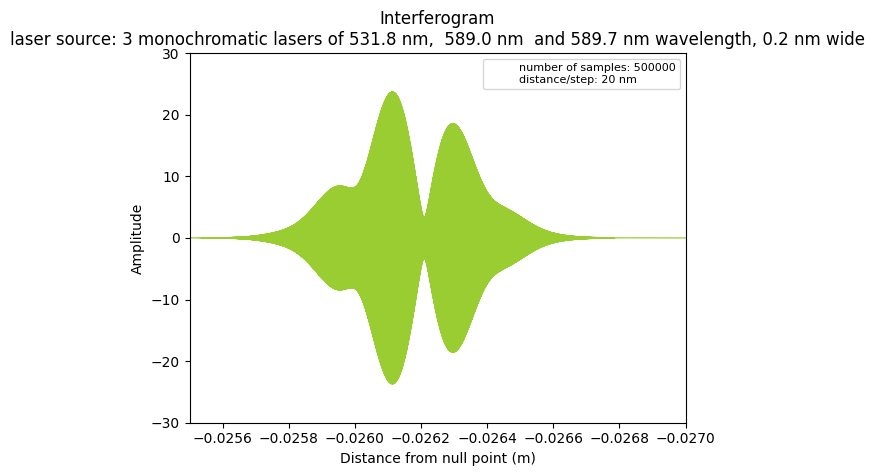

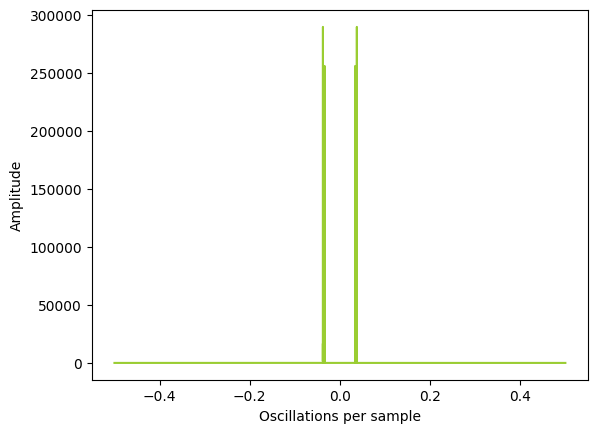

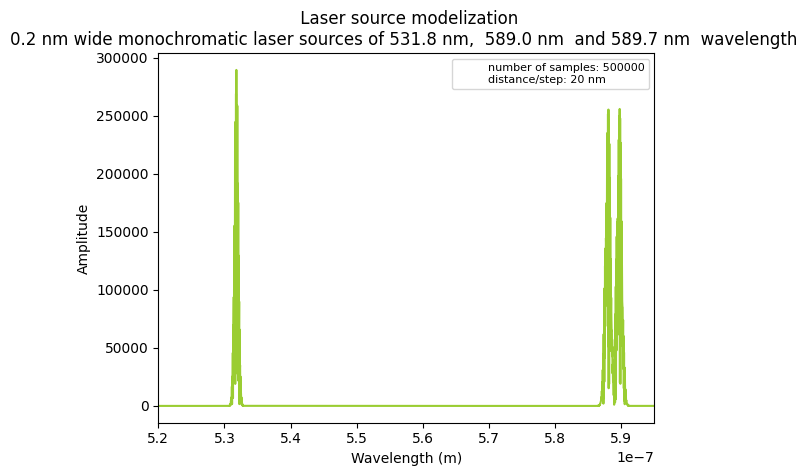

In [47]:
#!/usr/bin/python3

import numpy as np
import numpy.random as npr
import scipy as sp
import pylab as pl
import scipy.fftpack as spf

def add_line(x,y,wl,amp,width,nstep):
    """
    This little function adds the effect
    of a a new line on to the interferogram.
    It does this by assuming that each line is made up of lots of descrete delta functions. Also assumes a gausian line shape
    and calculates to +/- 3 sigma
    x is the separation between the mirrors
    y is the amplitude of the light
    wl is the wavelength
    amp is the amplitude (arbitrary scale)
    width is the line width (actually 1 sigma as we assume gaussian)
    nsteps is the 
    """
    #nwidth=30.
    nsigma=6
    amplitude=amp*calc_amp(nsigma,nstep)
    wl_step=nsigma*2.0*width/nstep
    for i in range(len(amplitude)):
        wavelength=wl-nsigma*width+i*wl_step
        y=y+amplitude[i]*np.sin(np.pi*2.*x/wavelength)        
    return y

def calc_amp(nsigma,nsamp):
    """
    Just calculates the amplitude at the various steps
    """
    yy=np.empty(shape=[nsamp])
    step=nsigma*2.0/nsamp
    for i in range(nsamp):
        x=-nsigma+i*step
        size=np.exp(-x*x/4)
        yy[i]=size
    return yy
  




# Now set up the experiment that you want to do

# Na lines
#l3=568.8e-9 # not sure about this one
l1=588e-9 # wavelength of spectral line in m
l2=589.7e-9 # wavelength of a second spectral line in m
w3=w1=w2=0.276e-9 # setting the lines to have the same width in m
#l1=800.e-9
#w1=200.e-9

'''
# When you perform the actual experiment you will move
# one mirror to change the path difference. This move will be 
# by a small, finite, amount. You will then take a reading with your detector. 
# Then you will move the mirror again and take another 
# reading and so on. Here you should set up the what these different 
# separations should be
'''

#changed to make it more like the actual experiment -DJC 09062018
nsamp=500000#number of readings that you will take (set in the software)
dist_per_step=20.e-9 #distance moved (new apparatus prob. 1nm step*2 for path length)
steps_per_sample=1
dsamp=dist_per_step*steps_per_sample

# set the starting point from null point
dstart= -30e-3 # start -3mm from null point

epoint=dstart+dsamp*nsamp



x= np.linspace(dstart,epoint,nsamp) #setting the x locations of the samples
# introduce a little jitter
# make it random for now
#sig_x=10e-9 # 10nm jitter
#for i in x:
#    i=npr.normal(scale=sig_x)+i


y=np.zeros(shape=[len(x)]) #setting the array that will contain your results



# Na spectrum (roughly)

y=add_line(x,y,l2,1.0,w1,50)
y=add_line(x,y,l1,1.0,w2,50)
#y=add_line(x,y,l3,0.05,w3,50)
#y=add_line(x,y,l1+0.1e-9,.25,w2,50)
#y=add_line(x,y,l1+0.2e-9,.25,w2,50)
#y=add_line(x,y,535*10**-9,1.0,w1,4000)


#white light 
y=add_line(x,y,531.8e-9,1,0.2e-9,50)

#print(2.*np.pi/l2) 

# plot the output

pl.figure(1)
pl.plot([],[],color="white", label="number of samples: 500000\ndistance/step: 20 nm")
pl.legend(fontsize=8)
pl.ylim(-30,30)
pl.xlim(-0.0255,-0.027)
pl.title("Interferogram\nlaser source: 3 monochromatic lasers of 531.8 nm,  589.0 nm  and 589.7 nm wavelength, 0.2 nm wide")
pl.plot(x,y, linewidth=0.9,color="yellowgreen")
pl.xlim(-0.0255,-0.027)

pl.xlabel("Distance from null point (m)")
pl.ylabel("Amplitude")




# take a fourier transform
yf=spf.fft(y)
xf=spf.fftfreq(nsamp) # setting the correct x-axis for the fourier transform. Osciallations/step

#now some shifts to make plotting easier (google if ineterested)
xf=spf.fftshift(xf)
yf=spf.fftshift(yf)


pl.figure(2)
pl.plot(xf,np.abs(yf),color="yellowgreen")
pl.xlabel("Oscillations per sample")
pl.ylabel("Amplitude")


# Now try to reconstruct the original wavelength spectrum
# only take the positive part of the FT
# need to go from oscillations per step to steps per oscillation
# time the step size


xx=xf[int(len(xf)/2+1):len(xf)]
repx=dsamp/xx

pl.figure(3)
pl.plot(repx,abs(yf[int(len(xf)/2+1):len(xf)]),color="yellowgreen")
pl.xlabel("Wavelength (m)")
pl.ylabel("Amplitude")
pl.title(" Laser source modelization\n0.2 nm wide monochromatic laser sources of 531.8 nm,  589.0 nm  and 589.7 nm  wavelength ")
pl.xlabel("Wavelength (m)")
pl.ylabel("Amplitude")
pl.plot([],[],color="white", label="number of samples: 500000\ndistance/step: 20 nm")
pl.legend(fontsize=8)
pl.xlabel("Wavelength (m)")
pl.ylabel("Amplitude")

pl.xlim(520*10**-9,595*10**-9)


pl.show()


/tmp/ipykernel_9515/1974204446.py:113: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  pl.plot(x,y,'bo-',linewidth=0.001,color="orangered")


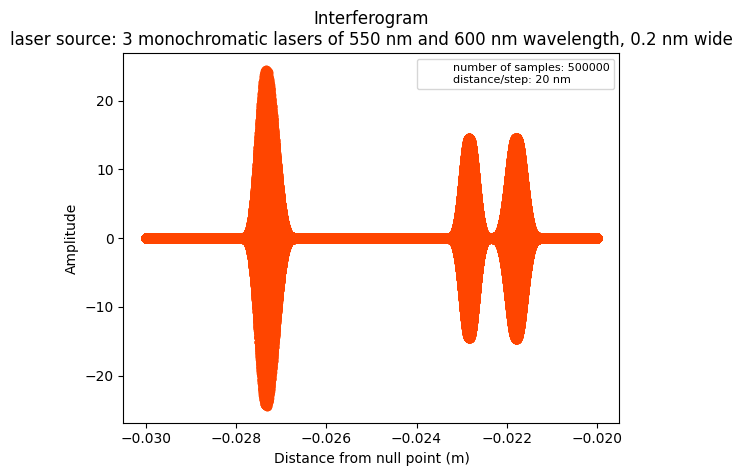

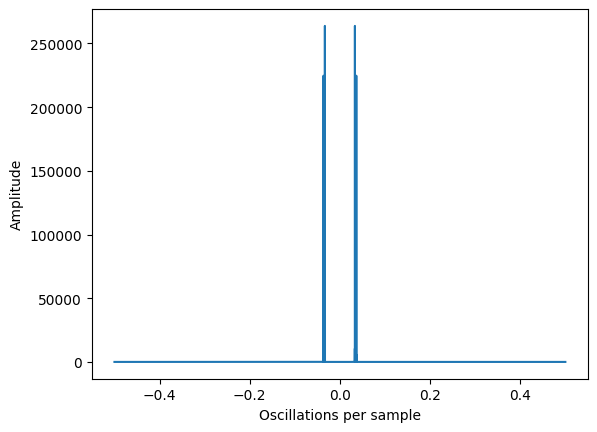

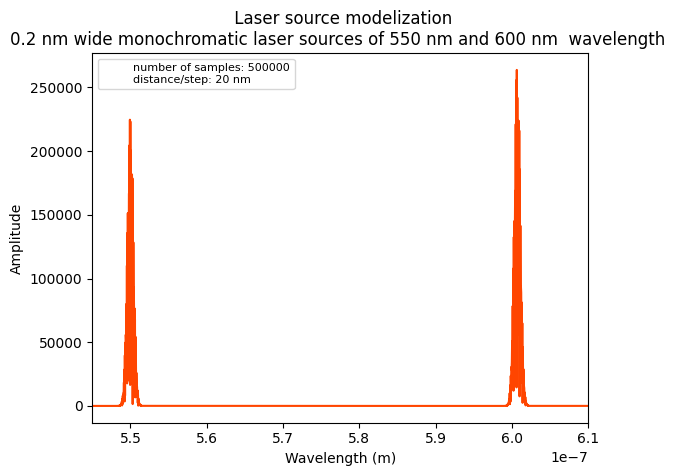

In [48]:

#!/usr/bin/python3

import numpy as np
import numpy.random as npr
import scipy as sp
import pylab as pl
import scipy.fftpack as spf

def add_line(x,y,wl,amp,width,nstep):
    """
    This little function adds the effect
    of a a new line on to the interferogram.
    It does this by assuming that each line is made up of lots of descrete delta functions. Also assumes a gausian line shape
    and calculates to +/- 3 sigma
    x is the separation between the mirrors
    y is the amplitude of the light
    wl is the wavelength
    amp is the amplitude (arbitrary scale)
    width is the line width (actually 1 sigma as we assume gaussian)
    nsteps is the 
    """
    #nwidth=30.
    nsigma=6
    amplitude=amp*calc_amp(nsigma,nstep)
    wl_step=nsigma*2.0*width/nstep
    for i in range(len(amplitude)):
        wavelength=wl-nsigma*width+i*wl_step
        y=y+amplitude[i]*np.sin(np.pi*2.*x/wavelength)        
    return y

def calc_amp(nsigma,nsamp):
    """
    Just calculates the amplitude at the various steps
    """
    yy=np.empty(shape=[nsamp])
    step=nsigma*2.0/nsamp
    for i in range(nsamp):
        x=-nsigma+i*step
        size=np.exp(-x*x/4)
        yy[i]=size
    return yy
  




# Now set up the experiment that you want to do

# Na lines
#l3=568.8e-9 # not sure about this one
l1=550e-9 # wavelength of spectral line in m
l2=600.7e-9 # wavelength of a second spectral line in m
w3=w1=w2=0.276e-9 # setting the lines to have the same width in m
#l1=800.e-9
#w1=200.e-9

'''
# When you perform the actual experiment you will move
# one mirror to change the path difference. This move will be 
# by a small, finite, amount. You will then take a reading with your detector. 
# Then you will move the mirror again and take another 
# reading and so on. Here you should set up the what these different 
# separations should be
'''

#changed to make it more like the actual experiment -DJC 09062018
nsamp=500000#number of readings that you will take (set in the software)
dist_per_step=20.e-9 #distance moved (new apparatus prob. 1nm step*2 for path length)
steps_per_sample=1
dsamp=dist_per_step*steps_per_sample

# set the starting point from null point
dstart= -30e-3 # start -3mm from null point

epoint=dstart+dsamp*nsamp



x= np.linspace(dstart,epoint,nsamp) #setting the x locations of the samples
# introduce a little jitter
# make it random for now
#sig_x=10e-9 # 10nm jitter
#for i in x:
#    i=npr.normal(scale=sig_x)+i


y=np.zeros(shape=[len(x)]) #setting the array that will contain your results



# Na spectrum (roughly)

y=add_line(x,y,l2,1.0,w1,50)
y=add_line(x,y,l1,1.0,w2,50)
#y=add_line(x,y,l3,0.05,w3,50)
#y=add_line(x,y,l1+0.1e-9,.25,w2,50)
#y=add_line(x,y,l1+0.2e-9,.25,w2,50)
#y=add_line(x,y,535*10**-9,1.0,w1,4000)


#white light 
#y=add_line(x,y,531.8e-9,0.082,0.2e-9,50)

#print(2.*np.pi/l2) 

# plot the output

pl.figure(1)
pl.plot([],[],color="white", label="number of samples: 500000\ndistance/step: 20 nm")
pl.legend(fontsize=8)

pl.title("Interferogram\nlaser source: 3 monochromatic lasers of 550 nm and 600 nm wavelength, 0.2 nm wide")
pl.plot(x,y,'bo-',linewidth=0.001,color="orangered")
#pl.xlim(-0.0255,-0.027)

pl.xlabel("Distance from null point (m)")
pl.ylabel("Amplitude")




# take a fourier transform
yf=spf.fft(y)
xf=spf.fftfreq(nsamp) # setting the correct x-axis for the fourier transform. Osciallations/step

#now some shifts to make plotting easier (google if ineterested)
xf=spf.fftshift(xf)
yf=spf.fftshift(yf)


pl.figure(2)
pl.plot(xf,np.abs(yf),)
pl.xlabel("Oscillations per sample")
pl.ylabel("Amplitude")


# Now try to reconstruct the original wavelength spectrum
# only take the positive part of the FT
# need to go from oscillations per step to steps per oscillation
# time the step size


xx=xf[int(len(xf)/2+1):len(xf)]
repx=dsamp/xx

pl.figure(3)
pl.plot(repx,abs(yf[int(len(xf)/2+1):len(xf)]),color="orangered")
pl.xlabel("Wavelength (m)")
pl.ylabel("Amplitude")

pl.title(" Laser source modelization\n0.2 nm wide monochromatic laser sources of 550 nm and 600 nm  wavelength ")
pl.plot([],[],color="white", label="number of samples: 500000\ndistance/step: 20 nm")
pl.legend(fontsize=8)


pl.xlim(545*10**-9,610*10**-9)


pl.show()


/tmp/ipykernel_9515/3982770713.py:105: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  pl.plot(x,y,'bo-',linewidth=0.001,color="lightblue")


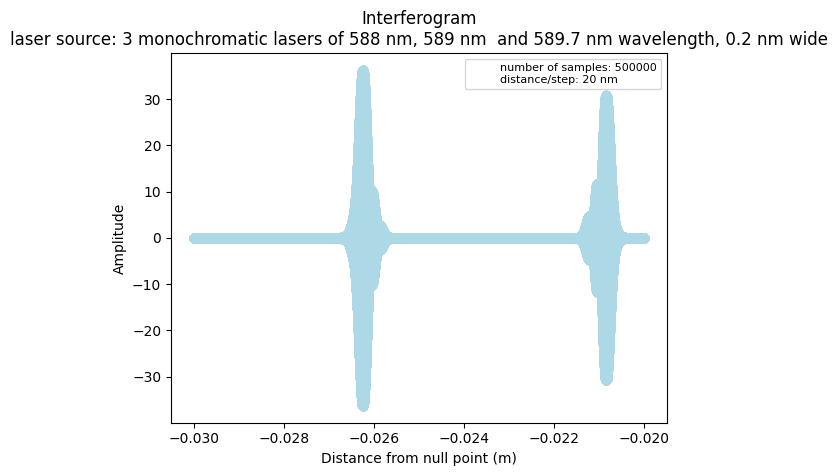

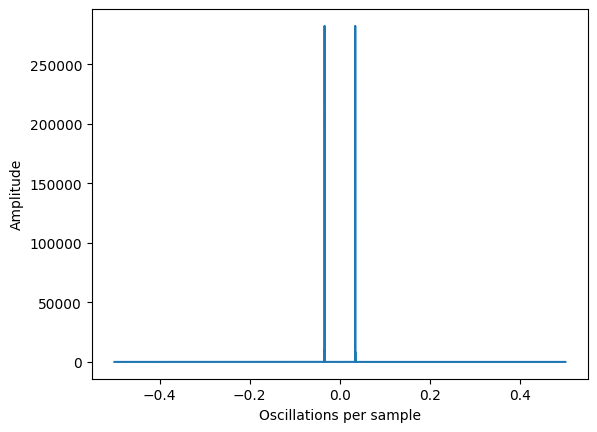

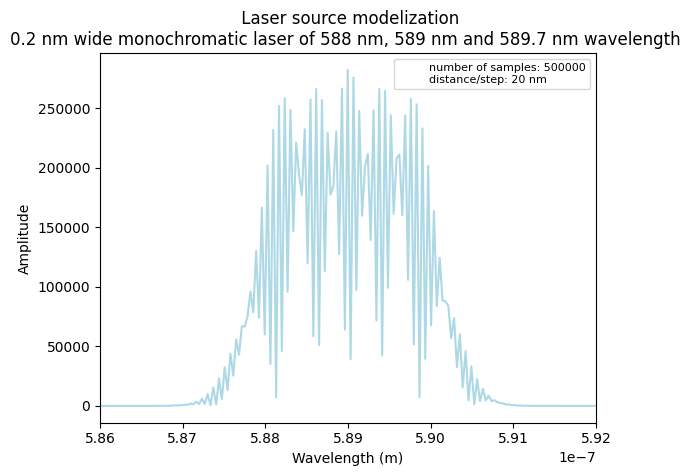

In [49]:
import scipy as sp
import pylab as pl
import scipy.fftpack as spf

def add_line(x,y,wl,amp,width,nstep):
    """
    This little function adds the effect
    of a a new line on to the interferogram.
    It does this by assuming that each line is made up of lots of descrete delta functions. Also assumes a gausian line shape
    and calculates to +/- 3 sigma
    x is the separation between the mirrors
    y is the amplitude of the light
    wl is the wavelength
    amp is the amplitude (arbitrary scale)
    width is the line width (actually 1 sigma as we assume gaussian)
    nsteps is the 
    """
    #nwidth=30.
    nsigma=6
    amplitude=amp*calc_amp(nsigma,nstep)
    wl_step=nsigma*2.0*width/nstep
    for i in range(len(amplitude)):
        wavelength=wl-nsigma*width+i*wl_step
        y=y+amplitude[i]*np.sin(np.pi*2.*x/wavelength)        
    return y

def calc_amp(nsigma,nsamp):
    """
    Just calculates the amplitude at the various steps
    """
    yy=np.empty(shape=[nsamp])
    step=nsigma*2.0/nsamp
    for i in range(nsamp):
        x=-nsigma+i*step
        size=np.exp(-x*x/4)
        yy[i]=size
    return yy
  




# Now set up the experiment that you want to do

# Na lines
l3=588.3e-9 # not sure about this one
l1=589e-9 # wavelength of spectral line in m
l2=589.7e-9 # wavelength of a second spectral line in m
w3=w1=w2=0.276e-9 # setting the lines to have the same width in m
#l1=800.e-9
#w1=200.e-9

'''
# When you perform the actual experiment you will move
# one mirror to change the path difference. This move will be 
# by a small, finite, amount. You will then take a reading with your detector. 
# Then you will move the mirror again and take another 
# reading and so on. Here you should set up the what these different 
# separations should be
'''

#changed to make it more like the actual experiment -DJC 09062018
nsamp=500000#number of readings that you will take (set in the software)
dist_per_step=20.e-9 #distance moved (new apparatus prob. 1nm step*2 for path length)
steps_per_sample=1
dsamp=dist_per_step*steps_per_sample

# set the starting point from null point
dstart= -30e-3 # start -3mm from null point

epoint=dstart+dsamp*nsamp



x= np.linspace(dstart,epoint,nsamp) #setting the x locations of the samples
# introduce a little jitter
# make it random for now
#sig_x=10e-9 # 10nm jitter
#for i in x:
#    i=npr.normal(scale=sig_x)+i


y=np.zeros(shape=[len(x)]) #setting the array that will contain your results



# Na spectrum (roughly)

y=add_line(x,y,l2,1.0,w1,50)
y=add_line(x,y,l1,1,w2,50)
y=add_line(x,y,l3,1,w3,50)
#y=add_line(x,y,l1+0.1e-9,.25,w2,50)
#y=add_line(x,y,l1+0.2e-9,.25,w2,50)
#y=add_line(x,y,535*10**-9,1.0,w1,4000)


#white light 
#y=add_line(x,y,531.8e-9,0.082,0.2e-9,50)

#print(2.*np.pi/l2) 

# plot the output

pl.figure(1)
pl.plot(x,y,'bo-',linewidth=0.001,color="lightblue")
pl.plot([],[],color="white", label="number of samples: 500000\ndistance/step: 20 nm")
pl.legend(fontsize=8)
pl.title("Interferogram\nlaser source: 3 monochromatic lasers of 588 nm, 589 nm  and 589.7 nm wavelength, 0.2 nm wide")
#pl.xlim(-0.03,-0.029)

pl.xlabel("Distance from null point (m)")
pl.ylabel("Amplitude")




# take a fourier transform
yf=spf.fft(y)
xf=spf.fftfreq(nsamp) # setting the correct x-axis for the fourier transform. Osciallations/step

#now some shifts to make plotting easier (google if ineterested)
xf=spf.fftshift(xf)
yf=spf.fftshift(yf)


pl.figure(2)
pl.plot(xf,np.abs(yf),)
pl.xlabel("Oscillations per sample")
pl.ylabel("Amplitude")


# Now try to reconstruct the original wavelength spectrum
# only take the positive part of the FT
# need to go from oscillations per step to steps per oscillation
# time the step size


xx=xf[int(len(xf)/2+1):len(xf)]
repx=dsamp/xx

pl.figure(3)
pl.plot(repx,abs(yf[int(len(xf)/2+1):len(xf)]),color="lightblue")
pl.xlabel("Wavelength (m)")
pl.ylabel("Amplitude")
pl.xlim(586*10**-9,592*10**-9)
pl.title(" Laser source modelization\n0.2 nm wide monochromatic laser of 588 nm, 589 nm and 589.7 nm wavelength ")
pl.plot([],[],color="white", label="number of samples: 500000\ndistance/step: 20 nm")
pl.legend(fontsize=8)

pl.show()

/tmp/ipykernel_9515/3179227765.py:105: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  pl.plot(x,y,'bo-',linewidth=0.001,color="navy")


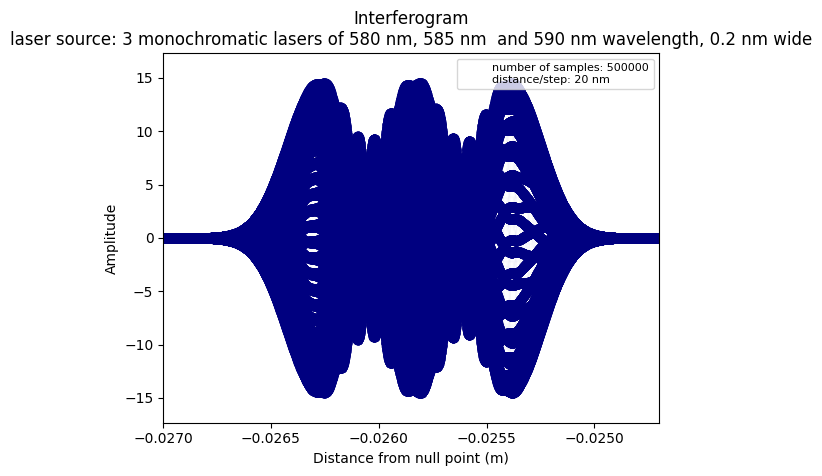

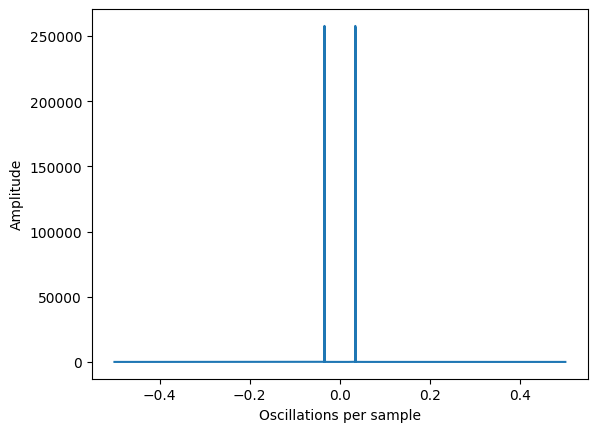

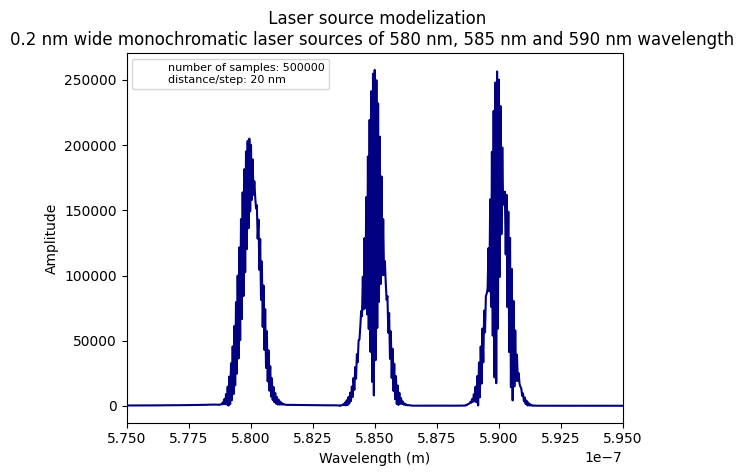

In [50]:
import scipy as sp
import pylab as pl
import scipy.fftpack as spf

def add_line(x,y,wl,amp,width,nstep):
    """
    This little function adds the effect
    of a a new line on to the interferogram.
    It does this by assuming that each line is made up of lots of descrete delta functions. Also assumes a gausian line shape
    and calculates to +/- 3 sigma
    x is the separation between the mirrors
    y is the amplitude of the light
    wl is the wavelength
    amp is the amplitude (arbitrary scale)
    width is the line width (actually 1 sigma as we assume gaussian)
    nsteps is the 
    """
    #nwidth=30.
    nsigma=6
    amplitude=amp*calc_amp(nsigma,nstep)
    wl_step=nsigma*2.0*width/nstep
    for i in range(len(amplitude)):
        wavelength=wl-nsigma*width+i*wl_step
        y=y+amplitude[i]*np.sin(np.pi*2.*x/wavelength)        
    return y

def calc_amp(nsigma,nsamp):
    """
    Just calculates the amplitude at the various steps
    """
    yy=np.empty(shape=[nsamp])
    step=nsigma*2.0/nsamp
    for i in range(nsamp):
        x=-nsigma+i*step
        size=np.exp(-x*x/4)
        yy[i]=size
    return yy
  




# Now set up the experiment that you want to do

# Na lines
l3=580e-9 # not sure about this one
l1=585e-9 # wavelength of spectral line in m
l2=590e-9 # wavelength of a second spectral line in m
w3=w1=w2=0.276e-9 # setting the lines to have the same width in m
#l1=800.e-9
#w1=200.e-9

'''
# When you perform the actual experiment you will move
# one mirror to change the path difference. This move will be 
# by a small, finite, amount. You will then take a reading with your detector. 
# Then you will move the mirror again and take another 
# reading and so on. Here you should set up the what these different 
# separations should be
'''

#changed to make it more like the actual experiment -DJC 09062018
nsamp=500000#number of readings that you will take (set in the software)
dist_per_step=20.e-9 #distance moved (new apparatus prob. 1nm step*2 for path length)
steps_per_sample=1
dsamp=dist_per_step*steps_per_sample

# set the starting point from null point
dstart= -30e-3 # start -3mm from null point

epoint=dstart+dsamp*nsamp



x= np.linspace(dstart,epoint,nsamp) #setting the x locations of the samples
# introduce a little jitter
# make it random for now
#sig_x=10e-9 # 10nm jitter
#for i in x:
#    i=npr.normal(scale=sig_x)+i


y=np.zeros(shape=[len(x)]) #setting the array that will contain your results



# Na spectrum (roughly)

y=add_line(x,y,l2,1.0,w1,50)
y=add_line(x,y,l1,1,w2,50)
y=add_line(x,y,l3,1,w3,50)
#y=add_line(x,y,l1+0.1e-9,.25,w2,50)
#y=add_line(x,y,l1+0.2e-9,.25,w2,50)
#y=add_line(x,y,535*10**-9,1.0,w1,4000)


#white light 
#y=add_line(x,y,531.8e-9,0.082,0.2e-9,50)

#print(2.*np.pi/l2) 

# plot the output

pl.figure(1)
pl.plot(x,y,'bo-',linewidth=0.001,color="navy")
pl.plot([],[],color="white", label="number of samples: 500000\ndistance/step: 20 nm")
pl.legend(fontsize=8)
pl.title("Interferogram\nlaser source: 3 monochromatic lasers of 580 nm, 585 nm  and 590 nm wavelength, 0.2 nm wide")
#pl.xlim(-0.03,-0.029)
pl.xlim(-0.027,-0.0247)

pl.xlabel("Distance from null point (m)")
pl.ylabel("Amplitude")




# take a fourier transform
yf=spf.fft(y)
xf=spf.fftfreq(nsamp) # setting the correct x-axis for the fourier transform. Osciallations/step

#now some shifts to make plotting easier (google if ineterested)
xf=spf.fftshift(xf)
yf=spf.fftshift(yf)


pl.figure(2)
pl.plot(xf,np.abs(yf),)
pl.xlabel("Oscillations per sample")
pl.ylabel("Amplitude")


# Now try to reconstruct the original wavelength spectrum
# only take the positive part of the FT
# need to go from oscillations per step to steps per oscillation
# time the step size


xx=xf[int(len(xf)/2+1):len(xf)]
repx=dsamp/xx

pl.figure(3)
pl.plot(repx,abs(yf[int(len(xf)/2+1):len(xf)]),color="navy")
pl.xlabel("Wavelength (m)")
pl.ylabel("Amplitude")
pl.title(" Laser source modelization\n0.2 nm wide monochromatic laser sources of 580 nm, 585 nm and 590 nm wavelength ")
pl.plot([],[],color="white", label="number of samples: 500000\ndistance/step: 20 nm")
pl.legend(fontsize=8)
pl.xlim(575*10**-9,595*10**-9)


pl.show()

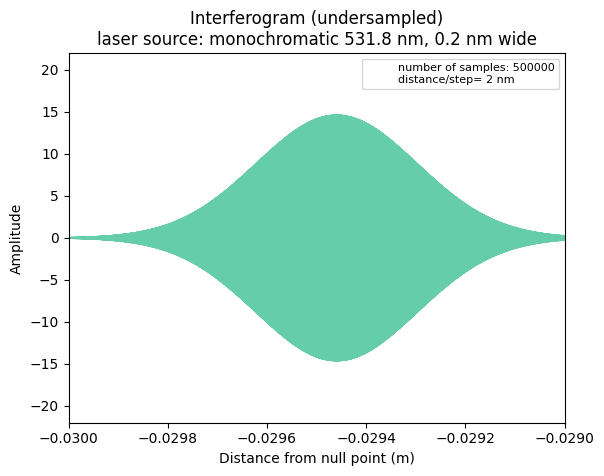

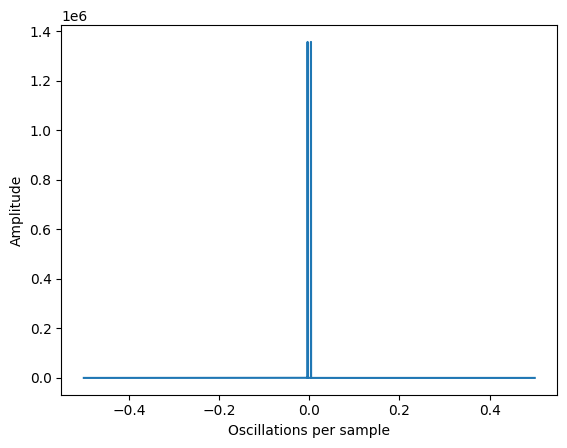

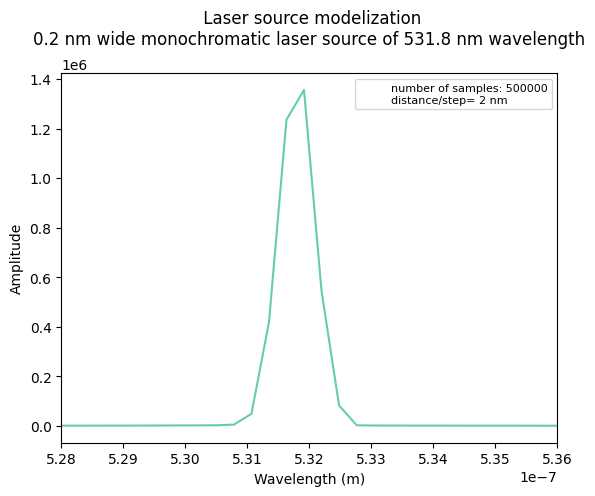

In [51]:

#!/usr/bin/python3

import numpy as np
import numpy.random as npr
import scipy as sp
import pylab as pl
import scipy.fftpack as spf

def add_line(x,y,wl,amp,width,nstep):
    """
    This little function adds the effect
    of a a new line on to the interferogram.
    It does this by assuming that each line is made up of lots of descrete delta functions. Also assumes a gausian line shape
    and calculates to +/- 3 sigma
    x is the separation between the mirrors
    y is the amplitude of the light
    wl is the wavelength
    amp is the amplitude (arbitrary scale)
    width is the line width (actually 1 sigma as we assume gaussian)
    nsteps is the 
    """
    #nwidth=30.
    nsigma=6
    amplitude=amp*calc_amp(nsigma,nstep)
    wl_step=nsigma*2.0*width/nstep
    for i in range(len(amplitude)):
        wavelength=wl-nsigma*width+i*wl_step
        y=y+amplitude[i]*np.sin(np.pi*2.*x/wavelength)        
    return y

def calc_amp(nsigma,nsamp):
    """
    Just calculates the amplitude at the various steps
    """
    yy=np.empty(shape=[nsamp])
    step=nsigma*2.0/nsamp
    for i in range(nsamp):
        x=-nsigma+i*step
        size=np.exp(-x*x/4)
        yy[i]=size
    return yy
  




# Now set up the experiment that you want to do

# Na lines
l3=590.8e-9 # not sure about this one
l1=585e-9 # wavelength of spectral line in m
l2=580.0e-9 # wavelength of a second spectral line in m
w3=w1=w2=0.276e-9 # setting the lines to have the same width in m
#l1=800.e-9
#w1=200.e-9

'''
# When you perform the actual experiment you will move
# one mirror to change the path difference. This move will be 
# by a small, finite, amount. You will then take a reading with your detector. 
# Then you will move the mirror again and take another 
# reading and so on. Here you should set up the what these different 
# separations should be
'''

#changed to make it more like the actual experiment -DJC 09062018
nsamp=500000#number of readings that you will take (set in the software)
dist_per_step=2.e-9 #distance moved (new apparatus prob. 1nm step*2 for path length)
steps_per_sample=1
dsamp=dist_per_step*steps_per_sample

# set the starting point from null point
dstart= -30e-3 # start -3mm from null point

epoint=dstart+dsamp*nsamp



x= np.linspace(dstart,epoint,nsamp) #setting the x locations of the samples
# introduce a little jitter
# make it random for now
#sig_x=10e-9 # 10nm jitter
#for i in x:
#    i=npr.normal(scale=sig_x)+i


y=np.zeros(shape=[len(x)]) #setting the array that will contain your results



# Na spectrum (roughly)

#y=add_line(x,y,l2,1.0,w1,50)
#y=add_line(x,y,l1,0.5,w2,50)
#y=add_line(x,y,l3,0.05,w3,50)
#y=add_line(x,y,l1+0.1e-9,.25,w2,50)
#y=add_line(x,y,l1+0.2e-9,.25,w2,50)
#y=add_line(x,y,535*10**-9,1.0,w1,4000)


#white light 
y=add_line(x,y,531.8e-9,1,0.2e-9,50)

#print(2.*np.pi/l2) 

# plot the output

pl.figure(1)
pl.plot(x,y,linewidth=0.9,color="mediumaquamarine")
pl.plot([],[],color="white", label="number of samples: 500000\ndistance/step= 2 nm")
pl.legend(fontsize=8)
pl.xlim(-0.03,-0.029)
pl.ylim(-22,22)
pl.title("Interferogram (undersampled)\nlaser source: monochromatic 531.8 nm, 0.2 nm wide")

pl.xlabel("Distance from null point (m)")
pl.ylabel("Amplitude")




# take a fourier transform
yf=spf.fft(y)
xf=spf.fftfreq(nsamp) # setting the correct x-axis for the fourier transform. Osciallations/step

#now some shifts to make plotting easier (google if ineterested)
xf=spf.fftshift(xf)
yf=spf.fftshift(yf)


pl.figure(2)
pl.plot(xf,np.abs(yf),)
pl.xlabel("Oscillations per sample")
pl.ylabel("Amplitude")


# Now try to reconstruct the original wavelength spectrum
# only take the positive part of the FT
# need to go from oscillations per step to steps per oscillation
# time the step size


xx=xf[int(len(xf)/2+1):len(xf)]
repx=dsamp/xx

pl.figure(3)

pl.plot(repx,abs(yf[int(len(xf)/2+1):len(xf)]),color="mediumaquamarine")
pl.title(" Laser source modelization\n0.2 nm wide monochromatic laser source of 531.8 nm wavelength\n ")
pl.xlabel("Wavelength (m)")
pl.ylabel("Amplitude")
pl.plot([],[],color="white", label="number of samples: 500000\ndistance/step= 2 nm")
pl.legend(fontsize=8)
pl.xlim(528*10**-9,536*10**-9)


pl.show()


/tmp/ipykernel_9515/2126180301.py:113: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  pl.plot(x,y,'bo-',linewidth=0.001,color="mediumaquamarine")


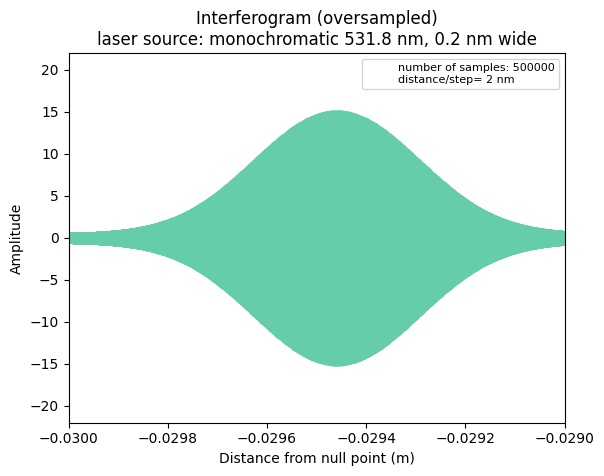

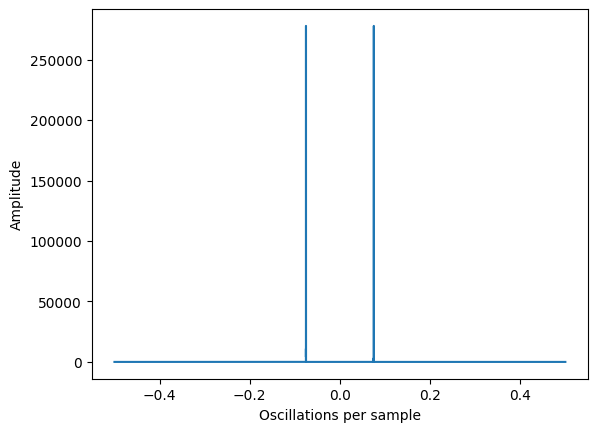

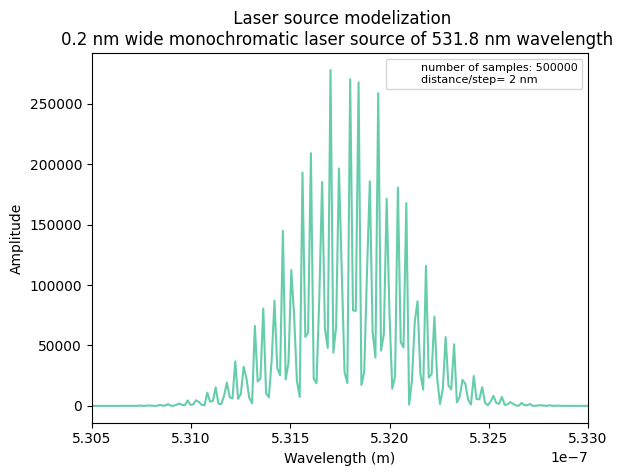

In [52]:
#!/usr/bin/python3



#!/usr/bin/python3

import numpy as np
import numpy.random as npr
import scipy as sp
import pylab as pl
import scipy.fftpack as spf

def add_line(x,y,wl,amp,width,nstep):
    """
    This little function adds the effect
    of a a new line on to the interferogram.
    It does this by assuming that each line is made up of lots of descrete delta functions. Also assumes a gausian line shape
    and calculates to +/- 3 sigma
    x is the separation between the mirrors
    y is the amplitude of the light
    wl is the wavelength
    amp is the amplitude (arbitrary scale)
    width is the line width (actually 1 sigma as we assume gaussian)
    nsteps is the 
    """
    #nwidth=30.
    nsigma=6
    amplitude=amp*calc_amp(nsigma,nstep)
    wl_step=nsigma*2.0*width/nstep
    for i in range(len(amplitude)):
        wavelength=wl-nsigma*width+i*wl_step
        y=y+amplitude[i]*np.sin(np.pi*2.*x/wavelength)        
    return y

def calc_amp(nsigma,nsamp):
    """
    Just calculates the amplitude at the various steps
    """
    yy=np.empty(shape=[nsamp])
    step=nsigma*2.0/nsamp
    for i in range(nsamp):
        x=-nsigma+i*step
        size=np.exp(-x*x/4)
        yy[i]=size
    return yy
  




# Now set up the experiment that you want to do

# Na lines
l3=590.8e-9 # not sure about this one
l1=585e-9 # wavelength of spectral line in m
l2=580.0e-9 # wavelength of a second spectral line in m
w3=w1=w2=0.276e-9 # setting the lines to have the same width in m
#l1=800.e-9
#w1=200.e-9

'''
# When you perform the actual experiment you will move
# one mirror to change the path difference. This move will be 
# by a small, finite, amount. You will then take a reading with your detector. 
# Then you will move the mirror again and take another 
# reading and so on. Here you should set up the what these different 
# separations should be
'''

#changed to make it more like the actual experiment -DJC 09062018
nsamp=500000#number of readings that you will take (set in the software)
dist_per_step=40.e-9 #distance moved (new apparatus prob. 1nm step*2 for path length)
steps_per_sample=1
dsamp=dist_per_step*steps_per_sample

# set the starting point from null point
dstart= -30e-3 # start -3mm from null point

epoint=dstart+dsamp*nsamp



x= np.linspace(dstart,epoint,nsamp) #setting the x locations of the samples
# introduce a little jitter
# make it random for now
#sig_x=10e-9 # 10nm jitter
#for i in x:
#    i=npr.normal(scale=sig_x)+i


y=np.zeros(shape=[len(x)]) #setting the array that will contain your results



# Na spectrum (roughly)

#y=add_line(x,y,l2,1.0,w1,50)
#y=add_line(x,y,l1,0.5,w2,50)
#y=add_line(x,y,l3,0.05,w3,50)
#y=add_line(x,y,l1+0.1e-9,.25,w2,50)
#y=add_line(x,y,l1+0.2e-9,.25,w2,50)
#y=add_line(x,y,535*10**-9,1.0,w1,4000)


#white light 
y=add_line(x,y,531.8e-9,1,0.2e-9,50)

#print(2.*np.pi/l2) 

# plot the output

pl.figure(1)
pl.plot(x,y,'bo-',linewidth=0.001,color="mediumaquamarine")
pl.plot([],[],color="white", label="number of samples: 500000\ndistance/step= 2 nm")
pl.legend(fontsize=8)
pl.xlim(-0.03,-0.029)
pl.ylim(-22,22)
pl.title("Interferogram (oversampled)\nlaser source: monochromatic 531.8 nm, 0.2 nm wide")

pl.xlabel("Distance from null point (m)")
pl.ylabel("Amplitude")




# take a fourier transform
yf=spf.fft(y)
xf=spf.fftfreq(nsamp) # setting the correct x-axis for the fourier transform. Osciallations/step

#now some shifts to make plotting easier (google if ineterested)
xf=spf.fftshift(xf)
yf=spf.fftshift(yf)


pl.figure(2)
pl.plot(xf,np.abs(yf),)
pl.xlabel("Oscillations per sample")
pl.ylabel("Amplitude")


# Now try to reconstruct the original wavelength spectrum
# only take the positive part of the FT
# need to go from oscillations per step to steps per oscillation
# time the step size


xx=xf[int(len(xf)/2+1):len(xf)]
repx=dsamp/xx

pl.figure(3)

pl.plot(repx,abs(yf[int(len(xf)/2+1):len(xf)]),color="mediumaquamarine")
pl.title(" Laser source modelization\n0.2 nm wide monochromatic laser source of 531.8 nm wavelength ")
pl.xlabel("Wavelength (m)")
pl.ylabel("Amplitude")
pl.plot([],[],color="white", label="number of samples: 500000\ndistance/step= 2 nm")
pl.legend(fontsize=8)
pl.xlim(530.5*10**-9,533*10**-9)


pl.show()

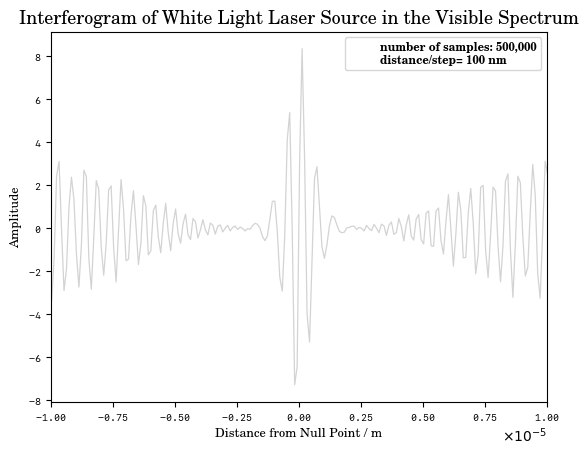

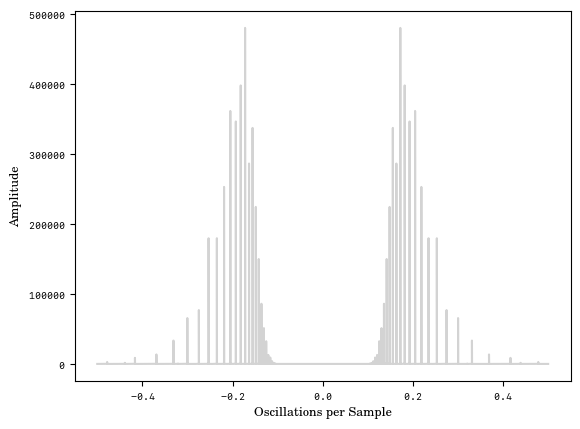

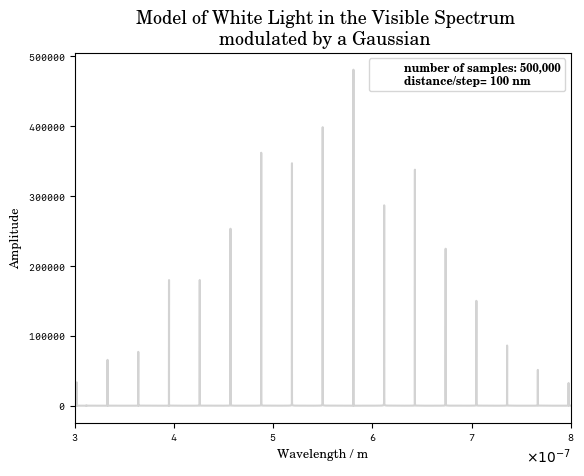

In [68]:
#!/usr/bin/python3

import numpy as np
import numpy.random as npr
import scipy as sp
import pylab as pl
import scipy.fftpack as spf
import matplotlib.font_manager as fnt

titleFont =     {'fontname': 'C059', 'size': 13}
axesFont =      {'fontname': 'C059', 'size': 9}
ticksFont =     {'fontname': 'SF Mono', 'size': 7}
errorStyle =    {'mew': 1, 'ms': 3, 'capsize': 3, 'color': 'blue', 'ls': ''}
pointStyle =    {'mew': 1, 'ms': 3, 'color': 'blue'}
lineStyle =     {'linewidth': 0.5}
lineStyleBold = {'linewidth': 1}
histStyle =     {'facecolor': 'green', 'alpha': 0.5, 'edgecolor': 'black'}
font = fnt.FontProperties(family='C059', weight='bold', style='normal', size=8)

def add_line(x,y,wl,amp,width,nstep):
    """
    This little function adds the effect
    of a a new line on to the interferogram.
    It does this by assuming that each line is made up of lots of descrete delta functions. Also assumes a gausian line shape
    and calculates to +/- 3 sigma
    x is the separation between the mirrors
    y is the amplitude of the light
    wl is the wavelength
    amp is the amplitude (arbitrary scale)
    width is the line width (actually 1 sigma as we assume gaussian)
    nsteps is the 
    """
    #nwidth=30.
    nsigma=6
    amplitude=amp*calc_amp(nsigma,nstep)
    wl_step=nsigma*2.0*width/nstep
    for i in range(len(amplitude)):
        wavelength=wl-nsigma*width+i*wl_step
        y=y+amplitude[i]*np.sin(np.pi*2.*x/wavelength)        
    return y

def calc_amp(nsigma,nsamp):
    """
    Just calculates the amplitude at the various steps
    """
    yy=np.empty(shape=[nsamp])
    step=nsigma*2.0/nsamp
    for i in range(nsamp):
        x=-nsigma+i*step
        size=np.exp(-x*x/4)
        yy[i]=size
    return yy
  

# Now set up the experiment that you want to do

# Na lines
l3=590.8e-9 # not sure about this one
l1=585e-9 # wavelength of spectral line in m
l2=580.0e-9 # wavelength of a second spectral line in m
w3=w1=w2=0.276e-9 # setting the lines to have the same width in m
#l1=800.e-9
#w1=200.e-9

'''
# When you perform the actual experiment you will move
# one mirror to change the path difference. This move will be 
# by a small, finite, amount. You will then take a reading with your detector. 
# Then you will move the mirror again and take another 
# reading and so on. Here you should set up the what these different 
# separations should be
'''

#changed to make it more like the actual experiment -DJC 09062018
nsamp=1000000#number of readings that you will take (set in the software)
dist_per_step=100.e-9 #distance moved (new apparatus prob. 1nm step*2 for path length)
steps_per_sample=1
dsamp=dist_per_step*steps_per_sample

# set the starting point from null point
dstart= -30e-3 # start -3mm from null point

epoint=dstart+dsamp*nsamp



x= np.linspace(dstart,epoint,nsamp) #setting the x locations of the samples
# introduce a little jitter
# make it random for now
#sig_x=10e-9 # 10nm jitter
#for i in x:
#    i=npr.normal(scale=sig_x)+i


y=np.zeros(shape=[len(x)]) #setting the array that will contain your results



# Na spectrum (roughly)

#y=add_line(x,y,l2,1.0,w1,50)
#y=add_line(x,y,l1,0.5,w2,50)
#y=add_line(x,y,l3,0.05,w3,50)
#y=add_line(x,y,l1+0.1e-9,.25,w2,50)
#y=add_line(x,y,l1+0.2e-9,.25,w2,50)
#y=add_line(x,y,535*10**-9,1.0,w1,4000)


#white light 
y=add_line(x,y,550e-9,1,300e-9/np.sqrt(15),30)

#print(2.*np.pi/l2) 

# plot the output

pl.figure(1)
pl.plot(x,y,linewidth=0.9,color="lightgrey")
pl.xlim(-0.00001,0.00001)
pl.plot([],[],color="white", label="number of samples: 500,000\ndistance/step= 100 nm")
pl.legend(fontsize=8, prop=font)
pl.title("Interferogram of White Light Laser Source in the Visible Spectrum", **titleFont)
pl.xlabel("Distance from Null Point / m", **axesFont)
pl.ylabel("Amplitude", **axesFont)
pl.xticks(**ticksFont)
pl.yticks(**ticksFont)
pl.ticklabel_format(useMathText=True)

# take a fourier transform
yf=spf.fft(y)
xf=spf.fftfreq(nsamp) # setting the correct x-axis for the fourier transform. Osciallations/step

#now some shifts to make plotting easier (google if ineterested)
xf=spf.fftshift(xf)
yf=spf.fftshift(yf)


pl.figure(2)
pl.plot(xf,np.abs(yf), color="lightgrey")
pl.xlabel("Oscillations per Sample", **axesFont)
pl.ylabel("Amplitude", **axesFont)
pl.xticks(**ticksFont)
pl.yticks(**ticksFont)
pl.ticklabel_format(useMathText=True)

# Now try to reconstruct the original wavelength spectrum
# only take the positive part of the FT
# need to go from oscillations per step to steps per oscillation
# time the step size


xx=xf[int(len(xf)/2+1):len(xf)]
repx=dsamp/xx

pl.figure(3)
pl.plot(repx,abs(yf[int(len(xf)/2+1):len(xf)]),color="lightgrey")
pl.title(" Model of White Light in the Visible Spectrum\n modulated by a Gaussian", **titleFont)
pl.xlabel("Wavelength / m", **axesFont)
pl.ylabel("Amplitude", **axesFont)
pl.plot([],[],color="white", label="number of samples: 500,000\ndistance/step= 100 nm")
pl.legend(fontsize=8, prop=font)
pl.xlim(300*10**-9,800*10**-9)
#pl.ylim(0,10000)
pl.xticks(**ticksFont)
pl.yticks(**ticksFont)
pl.ticklabel_format(useMathText=True)

pl.show()


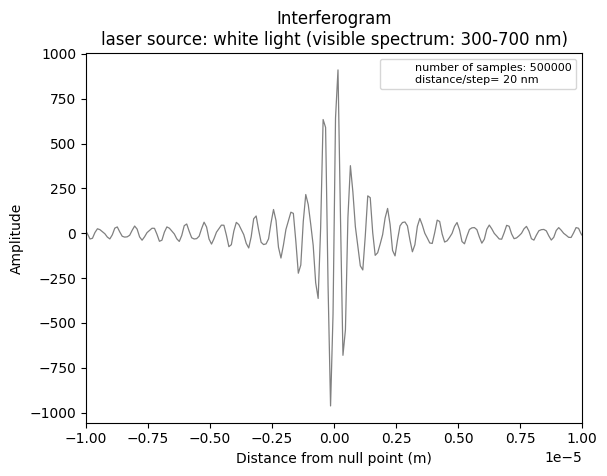

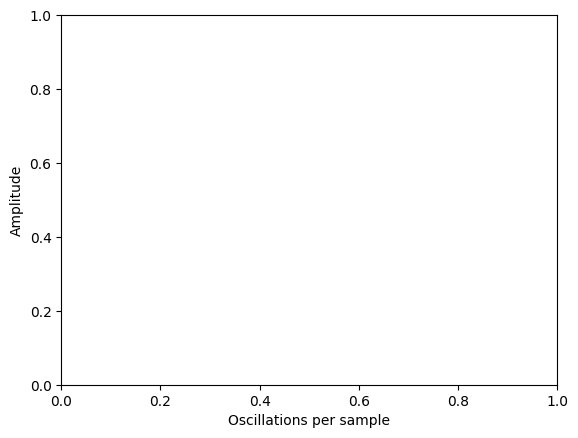

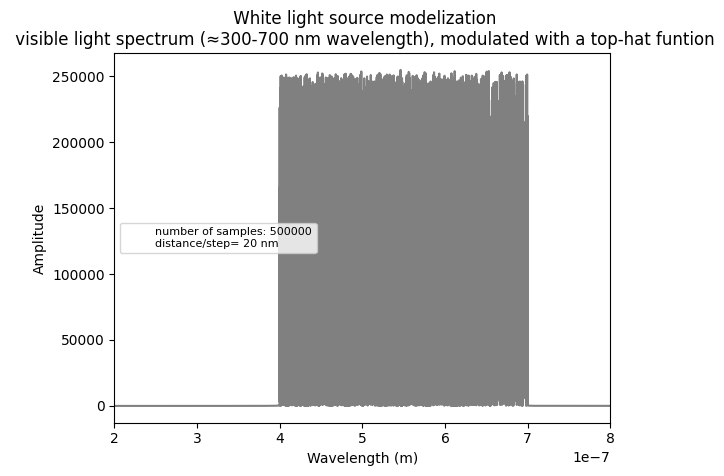

In [63]:
#!/usr/bin/python3

import numpy as np
import numpy.random as npr
import scipy as sp
import pylab as pl
import scipy.fftpack as spf

def add_line(x,y,wl,amp,width,nstep):
    """
    This little function adds the effect
    of a a new line on to the interferogram.
    It does this by assuming that each line is made up of lots of descrete delta functions. Also assumes a gausian line shape
    and calculates to +/- 3 sigma
    x is the separation between the mirrors
    y is the amplitude of the light
    wl is the wavelength
    amp is the amplitude (arbitrary scale)
    width is the line width (actually 1 sigma as we assume gaussian)
    nsteps is the 
    """
    #nwidth=30.
    nsigma=6
    amplitude=amp*calc_amp(nsigma,nstep)
    wl_step=nsigma*2.0*width/nstep
    for i in range(len(amplitude)):
        wavelength=wl-nsigma*width+i*wl_step
        y=y+amplitude[i]*np.sin(np.pi*2.*x/wavelength)        
    return y

def calc_amp(nsigma,nsamp):
    """
    Just calculates the amplitude at the various steps
    """
    yy=np.empty(shape=[nsamp])
    step=nsigma*2.0/nsamp
    for i in range(nsamp):
        x=-nsigma+i*step
        size=np.exp(-x*x/4)
        yy[i]=size
    return yy
  




# Now set up the experiment that you want to do

# Na lines
l3=590.8e-9 # not sure about this one
l1=585e-9 # wavelength of spectral line in m
l2=580.0e-9 # wavelength of a second spectral line in m
w3=w1=w2=0.276e-9 # setting the lines to have the same width in m
#l1=800.e-9
#w1=200.e-9

'''
# When you perform the actual experiment you will move
# one mirror to change the path difference. This move will be 
# by a small, finite, amount. You will then take a reading with your detector. 
# Then you will move the mirror again and take another 
# reading and so on. Here you should set up the what these different 
# separations should be
'''

#changed to make it more like the actual experiment -DJC 09062018
nsamp=500000#number of readings that you will take (set in the software)
dist_per_step=100.e-9 #distance moved (new apparatus prob. 1nm step*2 for path length)
steps_per_sample=1
dsamp=dist_per_step*steps_per_sample

# set the starting point from null point
dstart= -30e-3 # start -3mm from null point

epoint=dstart+dsamp*nsamp



x= np.linspace(dstart,epoint,nsamp) #setting the x locations of the samples
# introduce a little jitter
# make it random for now
#sig_x=10e-9 # 10nm jitter
#for i in x:
#    i=npr.normal(scale=sig_x)+i


y=np.zeros(shape=[len(x)]) #setting the array that will contain your results



# Na spectrum (roughly)

#y=add_line(x,y,l2,1.0,w1,50)
#y=add_line(x,y,l1,0.5,w2,50)
#y=add_line(x,y,l3,0.05,w3,50)
#y=add_line(x,y,l1+0.1e-9,.25,w2,50)
#y=add_line(x,y,l1+0.2e-9,.25,w2,50)
#y=add_line(x,y,535*10**-9,1.0,w1,4000)


#white light 
r=np.linspace(400*10**-9,700*10**-9,1000)
for i in r:
    y=add_line(x,y,i,1.0,10**-14,2)
   




# plot the output

pl.figure(1)
pl.plot(x,y,linewidth=0.9,color="grey")
pl.xlim(-0.00001,0.00001)
pl.plot([],[],color="white", label="number of samples: 500000\ndistance/step= 20 nm")
pl.legend(fontsize=8)

pl.title("Interferogram\nlaser source: white light (visible spectrum: 300-700 nm)")

pl.xlabel("Distance from null point (m)")
pl.ylabel("Amplitude")




# take a fourier transform
yf=spf.fft(y)
xf=spf.fftfreq(nsamp) # setting the correct x-axis for the fourier transform. Osciallations/step

#now some shifts to make plotting easier (google if ineterested)
xf=spf.fftshift(xf)
yf=spf.fftshift(yf)


pl.figure(2)
#pl.plot(xf,np.abs(yf),)
pl.xlabel("Oscillations per sample")
pl.ylabel("Amplitude")


# Now try to reconstruct the original wavelength spectrum
# only take the positive part of the FT
# need to go from oscillations per step to steps per oscillation
# time the step size


xx=xf[int(len(xf)/2+1):len(xf)]
repx=dsamp/xx

pl.figure(3)
pl.plot(repx,abs(yf[int(len(xf)/2+1):len(xf)]),color="grey")
pl.title(" White light source modelization\n visible light spectrum (≈300-700 nm wavelength), modulated with a top-hat funtion")
pl.xlabel("Wavelength (m)")
pl.ylabel("Amplitude")
pl.plot([],[],color="white", label="number of samples: 500000\ndistance/step= 20 nm")
pl.legend(fontsize=8)
pl.xlim(0,10000*10**-9)
#pl.ylim(0,10000)
pl.xlim(200*10**-9,800*10**-9)

pl.show()
